In [1]:
import numpy as np
import matplotlib.pyplot as plt
from odes import rungeKutta4
from scipy.integrate import solve_ivp

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 5.2 Métodos de Runge-Kutta

### 5.2.1 Explicación

$$\frac{dy}{dx} = f(x, y)$$

$$y(x_0) = y_0$$

Los métodos de Runge-Kutta son una serie de métodos que permiten mejorar la precisión sin requerir el cálculo de derivadas de orden superior. Su forma general es:

$$y_{i+1} = y_i + \phi(x_i, y_i, h) h$$

donde $\phi(x_i, y_i, h)$ se le llama función de incremento, y se puede interpretar como una representación de la pendiente de la curva sobre un intervalo dado. De forma general:

$$\phi = a_1 k_1 + a_2 k_2 + \cdots a_n k_n$$

**Método de Runge-Kutta de 4to orden:**

$$y_{i+1} = y_i + \frac{1}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right) h$$

donde:

$k_1 = f(x_i, \quad y_i)$

$k_2 = f\left(x_i+\frac{1}{2}h, \quad y_i+\frac{1}{2}k_1h\right)$

$k_3 = f\left(x_i+\frac{1}{2}h, \quad y_i+\frac{1}{2}k_2h\right)$

$k_4 =  f(x_i + h, \quad y_i + k_3h)$

**Implementación del método de Runge-Kutta 4to orden**

In [2]:
help(rungeKutta4)

Help on function rungeKutta4 in module odes:

rungeKutta4(f, y0, x_span, h)
    Implementación básica del método de Runge-Kutta 4to orden 
    para resolver una ecuación diferencial ordinaria.
    
    Parameters
    ----------
    
    f : function
        Python function return a number. `f` must e continuous.
    y0: scalar
        initial condition f(0)= y0
    x_span: tupple
        two-value tupple with the initial and final xvalues, (x0,xf)
        for evaluation of the function.
    h : scalar
        step-size in the x-direction
    
    Returns
    -------
    X : array
        x-values where the differential equation is evaluated.
    Y : array
        y-values where the differential equation is evaluated.



### 5.2.2 Ejemplo

#### 5.2.2.1 Ecuación polinómica

Utilice el método de Euler para integrar numéricamente la ecuación:

$$\frac{dy}{dx} = -2 x^3 + 12 x^2 - 20 x + 8.5$$

en el rango $x=[0, 4]$, y con la condición inicial $x_0, y_0 = [0, 1]$.

Estudie el efecto de tamaño de paso, empezando desde $h=0.5$.



In [3]:
def f(x, y=None):
    return -2*x**3 + 12*x**2 - 20*x + 8.5

Compare sus resultados contra la solución exacta, que esta dada por:

$$y = -0.5 x^4 + 4 x^3 - 10 x^2 + 8.5 x + 1$$

In [4]:
def F(x, y=None):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

**Aplicación del método de Runge-Kutta 4**

In [5]:
x_span = (0, 4)
y0 = 1

# Aplicando método a diferentes tamaños de paso
X50, Y50 = rungeKutta4(f, y0, x_span, h=0.5) 
X25, Y25 = rungeKutta4(f, y0, x_span, h=0.25)
X10, Y10 = rungeKutta4(f, y0, x_span, h=0.10)

**Análisis gráfico**

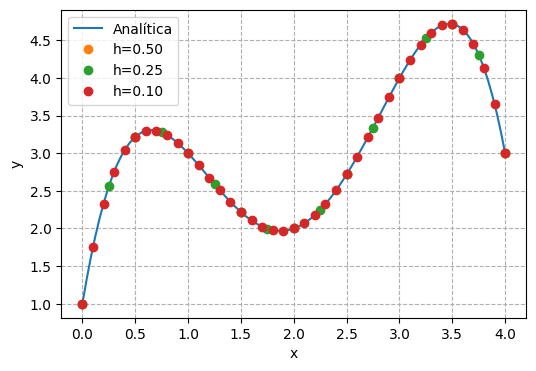

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0, 4, 100)
ax.plot(x, F(x), label='Analítica')
ax.plot(X50, Y50, ls='', marker='o', label='h=0.50')
ax.plot(X25, Y25, ls='', marker='o', label='h=0.25')
ax.plot(X10, Y10, ls='', marker='o', label='h=0.10')
ax.legend()
ax.set(xlabel='x', ylabel='y')
ax.grid(ls='--')
plt.show()

**Análisis de error**

In [7]:
print(f"x\ty(true)\t\ty(Euler)\terror(%)")
for xi, yi in zip(X50, Y50):
    et = 100*(F(xi) - yi)/F(xi)
    print(f"{xi:.2f}\t{F(xi):.5f}\t\t{yi:.5f}\t\t{et:.2f}")

x	y(true)		y(Euler)	error(%)
0.00	1.00000		1.00000		0.00
0.50	3.21875		3.21875		0.00
1.00	3.00000		3.00000		0.00
1.50	2.21875		2.21875		0.00
2.00	2.00000		2.00000		0.00
2.50	2.71875		2.71875		0.00
3.00	4.00000		4.00000		0.00
3.50	4.71875		4.71875		0.00
4.00	3.00000		3.00000		0.00


### 5.2.3 Ejemplo utilizando la función `solve_ivp()` de la librería `scipy`

In [8]:
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a co

#### 5.2.3.1 Ecuación polinómica

Utilice el método de Euler para integrar numéricamente la ecuación:

$$\frac{dy}{dx} = -2 x^3 + 12 x^2 - 20 x + 8.5$$

en el rango $x=[0, 4]$, y con la condición inicial $x_0, y_0 = [0, 1]$.

Estudie el efecto de tamaño de paso, empezando desde $h=0.5$.



In [9]:
def f(x, y=None):
    return -2*x**3 + 12*x**2 - 20*x + 8.5

Compare sus resultados contra la solución exacta, que esta dada por:

$$y = -0.5 x^4 + 4 x^3 - 10 x^2 + 8.5 x + 1$$

In [10]:
def F(x, y=None):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

In [11]:
# solución de la ecuación diferencial ordinaria
xy0 = [1]
t_span = (0, 4)
dx = 0.25
t_eval = np.arange(t_span[0], t_span[1]+dx, dx)
sol = solve_ivp(f, t_span, y0=xy0, method='RK45', t_eval=t_eval)

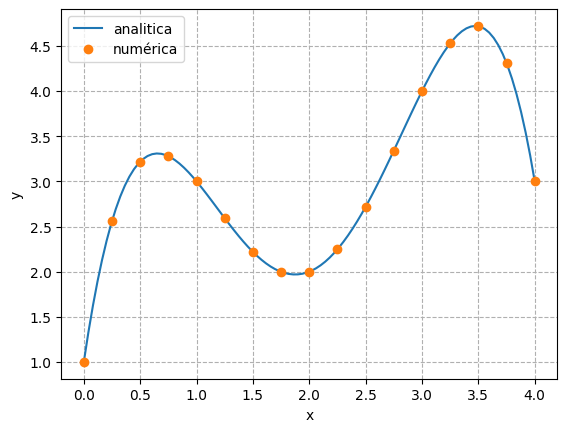

In [12]:
# gráfico de resultados
fig, ax = plt.subplots()
x = np.linspace(0, 4, 100)
ax.plot(x, F(x), label='analitica')
ax.plot(sol.t, sol.y[0], ls='', marker='o', label='numérica')
ax.set(xlabel='x', ylabel='y')
ax.grid(ls='--')
ax.legend()
plt.show()